**Regression of Food Production(Paddy) production in Indonesia**

1. Kind of Food Production : Paddy
2. Region Production     : Central Java 

## Import relevant modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# %tensorflow_version 2.x
# import tensorflow as tf

## Load Dataset

### Select Central Java Paddy production to make regression

Note : Production values in ton( weight unit of measure)

In [2]:
data_paddy = pd.read_csv('data/padi.csv')
data_paddy_central_java = data_paddy[data_paddy['Provinsi']=="DI YOGYAKARTA"]
data_paddy_central_java = data_paddy_central_java.drop(columns='Provinsi')
data_paddy_central_java = data_paddy_central_java.T
data_paddy_central_java = data_paddy_central_java.reset_index()
data_paddy_central_java = data_paddy_central_java.rename(columns={"index":"Years",13:"Comodition_in_Ton"})
data_paddy_central_java = data_paddy_central_java[['Years', 'Comodition_in_Ton']].apply(pd.to_numeric)
data_paddy_central_java.head()

,Years,Comodition_in_Ton
0,1993,644642
1,1994,643266
2,1995,642120
3,1996,661179
4,1997,647198


In [3]:
path_to_file = 'data/padi.csv'
province = 'DI YOGYAKARTA'
sliding_window = 3
train_test_proportion = 0.8

from preprocessing import preprocess

data = pd.read_csv(path_to_file)
preprocessed = preprocess(data[data['Provinsi'] == province],\
                            sliding_window)

/home/cdjodistiara/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Modeling
using feature from 1993 until 2013 to make model, will try to predict values at 2013, 2014, and 2015.

In [4]:
X_train = preprocessed[:int(train_test_proportion*len(preprocessed))]
X_test = preprocessed.drop(X_train.index)

y_train = X_train.pop(X_train.columns[-1])
y_test = X_test.pop(X_test.columns[-1])

In [5]:
model = Ridge()
# model = Lasso()

model.fit(X_train,y_train)
result = model.predict(X_test)
result_rounded = [round(num, 1) for num in result]

# result_and_real = pd.concat(X_test,result,y_test)
# result_and_real

print('r2: ', round(r2_score(y_test, result),3))
print('mse: ', round(mean_squared_error(y_test, result),3))
# print('rmse: ', round(mean_squared_error(y_test, result, squared=False),3))

r2:  -13.131
mse:  2215778019.275


In [6]:
Real_n_result = pd.DataFrame(list(zip(X_test.values.tolist(), result_rounded, y_test.tolist())), 
               columns =['Data', 'Prediction','Actual'])

Real_n_result

,Data,Prediction,Actual
0,"[837930, 823887, 842934]",880558.7,946224
1,"[823887, 842934, 946224]",970958.5,921824
2,"[842934, 946224, 921824]",954738.2,919573
3,"[946224, 921824, 919573]",975142.5,945136


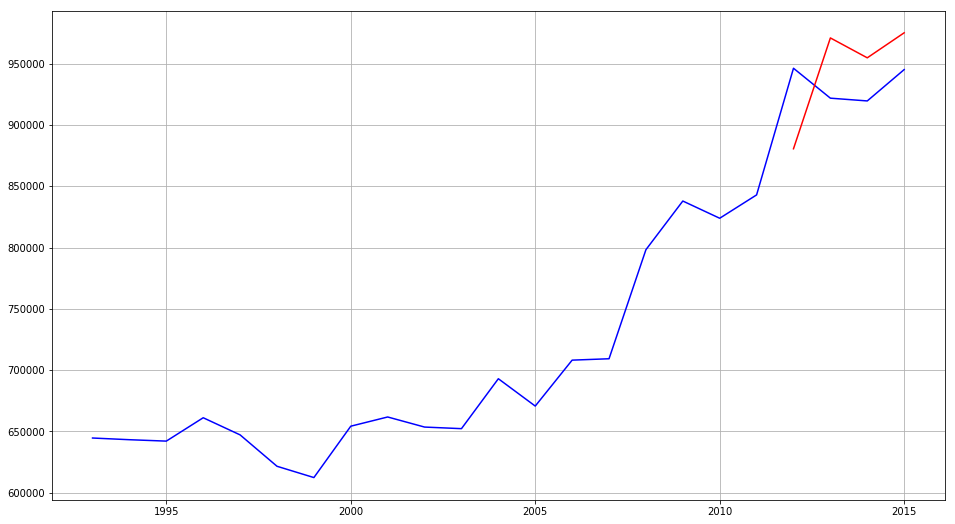

In [7]:
pred = data_paddy_central_java.rename(columns={"Comodition_in_Ton":'predict'}).iloc[-len(X_test):, :]
pred['predict'] = result_rounded
fig = plt.figure(figsize=(16,9))
plt.grid()
plt.plot(data_paddy_central_java['Years'], 
         data_paddy_central_java['Comodition_in_Ton'], 
#          kind='scatter',
         'b-')

plt.plot(pred['Years'], 
         pred['predict'], 
#          kind='scatter',
         'r-')

plt.show()